In [4]:
import numpy as np
import util as util
from linear_model import LinearModel

In [3]:
!pip install ipynb

In [9]:
# from Logistic_Regression import LogisticRegression
# from GDA import GDA
from ipynb.fs.full.Logistic_Regression import *
from ipynb.fs.full.GDA import *

Load the datasets:

In [6]:
class Dataset:
    def __init__(self, train_path, eval_path):
        self.x_train, self.y_train = util.load_dataset(train_path, add_intercept=False)
        self.x_val, self.y_val = util.load_dataset(eval_path, add_intercept=False)
        self.x_train_intercept, self.y_train_intercept = util.load_dataset(train_path, add_intercept=True)
        self.x_val_intercept, self.y_val_intercept = util.load_dataset(eval_path, add_intercept=True)
        
ds1 = Dataset('/content/data/ds1_train.csv', '/content/data/ds1_valid.csv')
ds2 = Dataset('/content/data/ds2_train.csv', '/content/data/ds2_valid.csv')

Let's take a look at the two training sets:

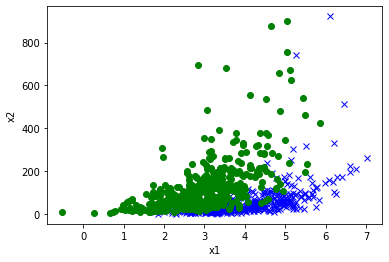

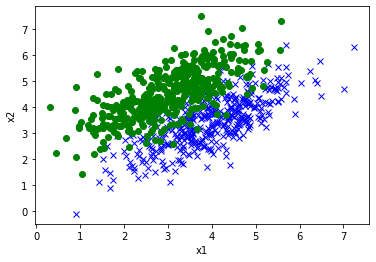

In [7]:
util.myplot(ds1.x_train, ds1.y_train)
util.myplot(ds2.x_train, ds2.y_train)

**Decision boundaries on dataset 1** (Logistic regression in red, GDA in black):

theta for logistic regression: [-6.26018491  2.47707251 -0.0299125 ]
                theta for GDA: [-6.17158405  2.22055506 -0.01763375]


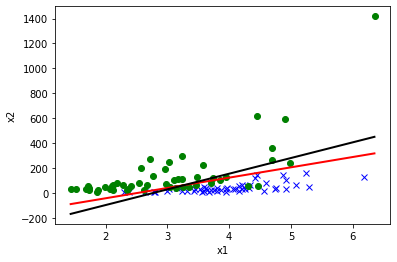

In [10]:
util.myplot(ds1.x_val, ds1.y_val, logreg1.theta, gda1.theta)
print("theta for logistic regression:",logreg1.theta)
print("                theta for GDA:", gda1.theta)

**Decisionboundaries on dataset 2** (Logistic regression in red, GDA in black):

theta for logistic regression: [ 2.38425454  3.6371206  -3.81234337]
                theta for GDA: [ 2.50874989  3.76951271 -3.94657107]


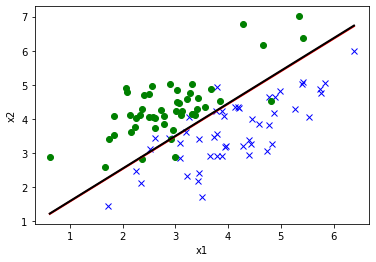

In [11]:
util.myplot(ds2.x_val, ds2.y_val, logreg2.theta, gda2.theta)
print("theta for logistic regression:",logreg2.theta)
print("                theta for GDA:", gda2.theta)

To compare the models, let's compute their accuracies:

In [12]:
def accuracy(clf, x_val, y_val):
    y_pred = clf.predict(x_val)
    #print(y_pred)
    correct = np.sum(y_pred == y_val)
    total = y_val.shape[0]
    return correct / total

In [13]:
logreg1_acc = accuracy(logreg1, ds1.x_val_intercept, ds1.y_val)
logreg2_acc = accuracy(logreg2, ds2.x_val_intercept, ds2.y_val)
gda1_acc = accuracy(gda1, ds1.x_val, ds1.y_val)
gda2_acc = accuracy(gda2, ds2.x_val, ds2.y_val)

print("Accuracies on dataset 1:")
print("Logistic regression:", logreg1_acc)
print("                GDA:", gda1_acc)
print("********************************")
print("Accuracies on dataset 2:")
print("Logistic regression:", logreg2_acc)
print("                GDA:", gda2_acc)

Accuracies on dataset 1:
Logistic regression: 0.9
                GDA: 0.83
********************************
Accuracies on dataset 2:
Logistic regression: 0.91
                GDA: 0.91


So while both logistic regression and GDA seem to have the same performance on dataset 2, GDA performs worse on dataset 1.

The reason for this is that dataset 1 doesn't fit the model assumptions of GDA as well as dataset 2, i.e. the data in dataset 1 does not fit well to a multivariate gaussian distribution.

Let's have another look at dataset 1:

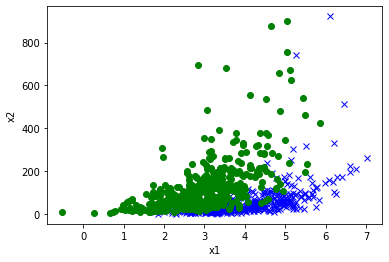

In [14]:
util.myplot(ds1.x_train, ds1.y_train)

The $x_2$ values of both classes seem to be positive and there seem to be many values close to $0$. Let's transform the data by applying $\log$ to $x_2$ and leaving $x_1$ unchanged.

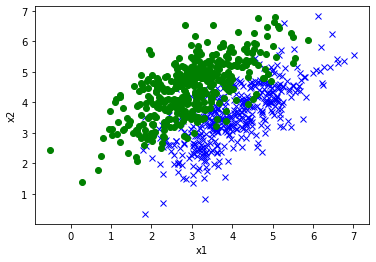

In [15]:
transform = lambda x: np.stack((x[:,0], np.log(x[:,1])), axis=1)

x_train = transform(ds1.x_train)
util.myplot(x_train, ds1.y_train)

This looks more gaussian. Let's fit a GDA model to the transformed dataset:

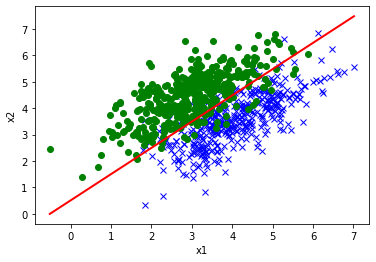

In [16]:
gda3 = GDA()
gda3.fit(x_train, ds1.y_train)
util.myplot(x_train,ds1.y_train, gda3.theta)

Finally let's check if we could improve the accuracy:

In [17]:
x_val = transform(ds1.x_val)
gda3_acc = accuracy(gda3,x_val, ds1.y_val)
print("   GDA accuracy on original dataset1:", gda1_acc)
print("GDA accuracy on transformed dataset1:", gda3_acc)

   GDA accuracy on original dataset1: 0.83
GDA accuracy on transformed dataset1: 0.95


This is a much better fit.

Just for fun let's also train a logistic regression model on the transformed dataset and then compare its performance to our new GDA model.

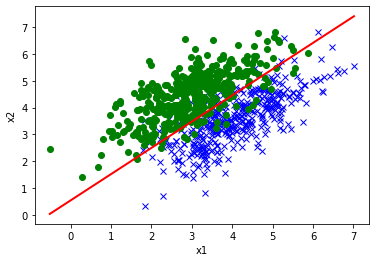

In [18]:
logreg3 = LogisticRegression()
x_train_intercept = util.add_intercept(x_train)
logreg3.fit(x_train_intercept, ds1.y_train)
util.myplot(x_train,ds1.y_train, logreg3.theta)

In [19]:
x_val_intercept = util.add_intercept(x_val)
logreg3_acc = accuracy(logreg3,x_val_intercept, ds1.y_val)
print("Logistic regression accuracy on transformed dataset1:", logreg3_acc)
print("                GDA accuracy on transformed dataset1:", gda3_acc)

Logistic regression accuracy on transformed dataset1: 0.95
                GDA accuracy on transformed dataset1: 0.95


theta for logistic regression (red): [ 1.96299173  3.56623663 -3.64318719]
              theta for GDA (black): [ 1.89345089  3.69641657 -3.71982993]


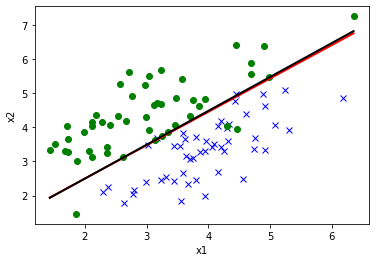

In [20]:
print("theta for logistic regression (red):", logreg3.theta)
print("              theta for GDA (black):",gda3.theta)
util.myplot(x_val, ds1.y_val, logreg3.theta, gda3.theta)